# Тестирование Louvain алгоритма


Для тестирования алгоритма будем использовать библиотеку для работы с графами **NetworkX** и пакет **python-louvain**,
в котором реализован louvain алгоритм.

Библиотека **NetworkX** присутствует в пакетном менеджере **pip**, поэтому для установки достаточно набрать `pip install networkx`.

Для **python-louvain** аналогично: `pip install python-louvain`, но импортируется данный пакет под названием **community**


In [1]:
import community
import networkx as nx
import matplotlib.pyplot as plt

Попробуем использовать данный алгоритм на стандартном датасете: **Zachary karate club**

In [2]:
G = nx.karate_club_graph()

In [3]:
partition = community.best_partition(G)

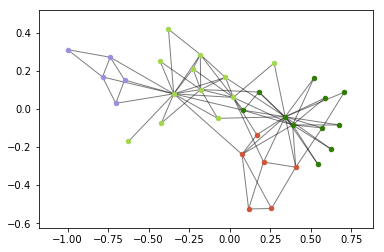

0.4188034188034188


In [5]:
import numpy as np

size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    colors = [np.random.rand(3)]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, 
                           node_color = colors)

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()
modularity = community.modularity(partition, G)
print(modularity)

Часто используемый граф для тестирования алгоритмов нахождения сообществ - planted partition граф

In [100]:
l = 4
k = 32
Pin = 0.35
Pout = 0.01


In [101]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [102]:
pl_partition = community.best_partition(E)

In [103]:
n = l * k
list_ = [ i // k for i in range(0,  n)]
print(list_)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


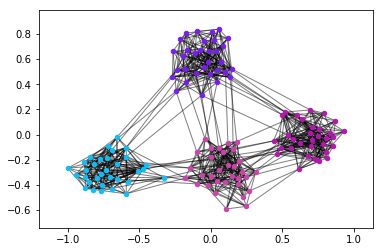

0.6876281139621684


In [106]:
size = float(len(set(pl_partition.values())))
pos1 = nx.spring_layout(E)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])


nx.draw_networkx_edges(E, pos1, alpha=0.5)
plt.show()
modularity = community.modularity(pl_partition, E)
print(modularity)

In [83]:
pos1 = nx.spring_layout(E)
count = 0.
for com in set(list_):
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])
    count = count + 1.
cmp = []
for i in range(0,  n):
    if list_[i] == pl_partition[i]:
        cmp.append(1)
    else:
        cmp.append(0)
print(cmp)
percent_of_right_nodes = sum(cmp) / n
print(percent_of_right_nodes)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0


Используем алгоритм на примере, приведенном в статье: граф, состоящий из тридцати клик, в каждой из которых пять вершин.
Если клики расположить по кругу, то каждую клику нужно соединить с соседними одним ребром

In [25]:
l = 30
k = 5
Pin = 1
Pout = 0.0

In [26]:
E = nx.planted_partition_graph(l, k, Pin, Pout)

In [27]:
for i in range(4, 148, 5):
    E.add_edge(i, i + 1)
E.add_edge(149, 0)

In [28]:
pl_partition = community.best_partition(E)

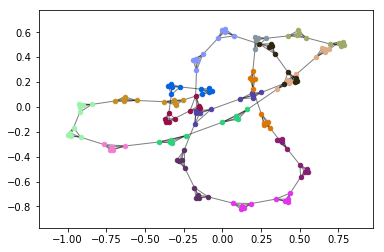

0.8870707070707073


In [29]:
# pos1 = nx.spring_layout(E)
# nx.draw_networkx_nodes(E, pos1, node_size = 20)
# nx.draw_networkx_edges(E,pos1, alpha=0.5)
# plt.show()
# print(pl_partition)
# mod = community.modularity(pl_partition, E)
# print(mod)

size = float(len(set(pl_partition.values())))
pos1 = nx.spring_layout(E)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(E, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])


nx.draw_networkx_edges(E, pos1, alpha=0.5)
plt.show()
mod = community.modularity(pl_partition, E)
print(mod)

Результат может изменяться в зависимости от того, в каком порядке расположены вершины.
В предыдущем примере изменим порядок расположения вершин и посмотрим на результат.

In [22]:
import numpy as np
rand = np.random.permutation(l * k)
R = nx.Graph()
for ed in E.edges:
    if (rand[ed[0]], rand[ed[1]]) not in R.edges:
        R.add_edge(rand[ed[0]], rand[ed[1]])

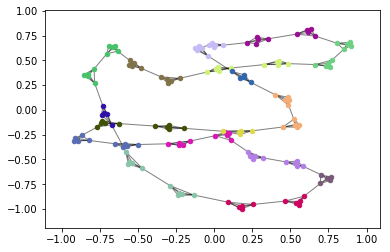

0.8862626262626265


In [32]:


# pos1 = nx.spring_layout(R)
# nx.draw_networkx_nodes(R, pos1, node_size = 20)
# nx.draw_networkx_edges(R,pos1, alpha=0.5)
# plt.show()
# print(pl_partition)
# mod = community.modularity(pl_partition, R)
# print(mod)

#size = float(len(set(pl_partition.values())))
pl_partition = community.best_partition(R)
pos1 = nx.spring_layout(R)
count = 0.
for com in set(pl_partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in pl_partition.keys()
                                if pl_partition[nodes] == com]
    nx.draw_networkx_nodes(R, pos1, list_nodes, node_size = 20,
                                node_color = [np.random.rand(3)])


nx.draw_networkx_edges(R, pos1, alpha=0.5)
plt.show()
mod = community.modularity(pl_partition, R)
print(mod)

Итоговый результат оказался аналогичен результату, полученному в случае, когда вершины были упорядочены

Стоит попробовать алгоритм на больших графах, для исследования которых он и предназначен.
Я решил взять датасет, на котором производилось тестирование в статье. Это абоненты бельгийской телефонной сети, в ней 2.6 млн вершин и 6.3 млн ребер. К сожалению, данного датасета в открытом доступе я не нашел, поэтому решил выбрать датасет похожего размера.
Так я выбрал [данный датасет.](http://snap.stanford.edu/data/com-Youtube.html) В нем 1,134,890 вершин и 2,987,624 ребра.

In [3]:
import numpy as np
Data = np.loadtxt('/home/maxim/work/com-youtube.ungraph.txt', dtype = int, skiprows = 1)
N, dp1 = Data.shape

In [4]:
print(N, dp1)

2987624 2


In [5]:
print(Data[:20])

[[ 1  2]
 [ 1  3]
 [ 1  4]
 [ 1  5]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 1  9]
 [ 1 10]
 [ 1 11]
 [ 1 12]
 [ 1 13]
 [ 1 14]
 [ 1 15]
 [ 1 16]
 [ 1 17]
 [ 1 18]
 [ 1 19]
 [ 1 20]
 [ 1 21]]


In [6]:
G = nx.Graph()
for row in Data:
    G.add_edge(*tuple(row))


In [7]:
import time

start = time.time()

partition = community.best_partition(G)
end = time.time()
print(end - start)

KeyboardInterrupt: 

In [1]:
import numpy as np

Data = np.loadtxt('/home/maxim/work/com-amazon.ungraph.txt', dtype = int, skiprows = 1)
N, dp1 = Data.shape

In [2]:
print(N, dp1)

925872 2


In [4]:
import networkx as nx
import community

G = nx.Graph()
for row in Data:
    G.add_edge(*tuple(row))

In [5]:
import time

start = time.time()

partition = community.best_partition(G)
end = time.time()
print(end - start)

433.0649063587189


In [7]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.

for com in set(partition.values()):
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    colors = [np.random.rand(3)]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20, 
                           node_color = colors)

nx.draw_networkx_edges(G,pos, alpha=0.5)
plt.show()
modularity = community.modularity(partition, G)
print(modularity)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.